# Submetric 1: **Safety**

## The importance of safety

Obviously, crime itself is a problem nobody wants to deal with, but *fear of crime* is often overlooked and is as much of a problem. <br />

Fear of crime can be very stressful and mentally taxing. Nobody should have to worry about their kids playing outside or the safety of their belongings when at home.

---

## Pittsburgh Police Arrest Dataset
Includes data from **August 2016** to **March 2022**

We will be using `INCIDENTNEIGHBORHOOD` and querying `OFFENSES` from this dataset to determine which neighborhoods are the safest.

In [154]:
import pandas as pd
import matplotlib.pyplot as plot
import geopandas
dset = pd.read_csv('e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv')
dset = dset[dset['INCIDENTNEIGHBORHOOD'] != 'Outside County']
dset = dset[dset['INCIDENTNEIGHBORHOOD'] != 'Outside State'] # Remove these since they are not Pittsburgh neighborhoods
dset.head(3)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625


---
## Measuring safety with this data

When sorting neighborhoods by `count` of all crimes, we see the Central Business District (Downtown) way above the rest

In [158]:
df = dset.groupby('INCIDENTNEIGHBORHOOD')['OFFENSES'].describe().sort_values(by='count', ascending=False)
df

count                       70
unique                      48
top       2701 Simple Assault.
freq                         7
Name: Oakwood, dtype: object

But this statistic can be misleading. When we sort Neighborhoods by `count` of **Driving related crimes**, we see South Side Flats above the rest while the Central Business District does't break the top 5

In [120]:
query = dset['OFFENSES'].str.contains('Driving', na=False) 
crimesEX = dset[query].groupby('INCIDENTNEIGHBORHOOD')['OFFENSES'].describe().sort_values(by='count', ascending=False)
crimesEX.head()

,count,unique,top,freq
INCIDENTNEIGHBORHOOD,,,,
South Side Flats,241,208,3736 Reckless Driving / 3802(a)(1) DUI - Gener...,9
Homewood South,231,189,1543 Driving While Operating Privilege is Susp...,9
Carrick,174,158,1543 Driving While Operating Privilege is Susp...,3
Homewood North,166,148,1543 Driving While Operating Privilege is Susp...,4
Mount Washington,157,136,3714 Careless Driving / 3802(a)(1) DUI - Gener...,7


It is for this reason that I think the best metric to judge Neighborhoods is by the number of `unique` offenses<br />

By using unique offenses as a metric we reduce the affect that population will have on neighborhoods<br /> 
* A neighborhood of 1,000 people with *n* unique offenses will be weighed the same as a neighborhood of 100,000 people with *n* unique offenses.

## Representing our data

<AxesSubplot:xlabel='INCIDENTNEIGHBORHOOD', ylabel='unique OFFENSES'>

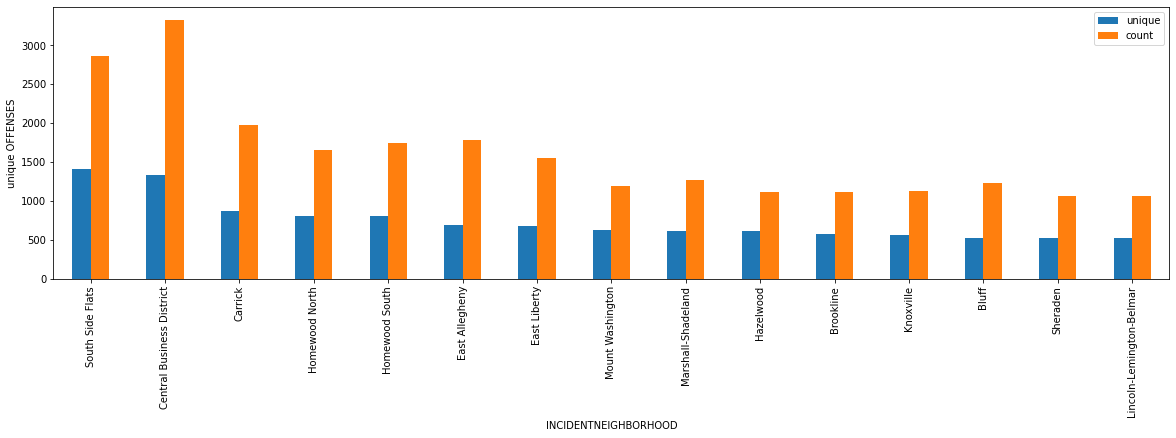

In [121]:
df.sort_values(by='unique', ascending=False).iloc[:15].plot.bar(y=['unique', 'count'], ylabel='unique OFFENSES', figsize=(20,5))

Here are the 15 neighborhoods with the highest amount of unique offenses, along with the total amount of offenses for that neighborhood. <br />

We reach a sweet spot as the number of **total** offenses reaches the number of **unique** offenses
- This suggests that the most crimes are not recurring

<AxesSubplot:xlabel='INCIDENTNEIGHBORHOOD', ylabel='unique OFFENSES'>

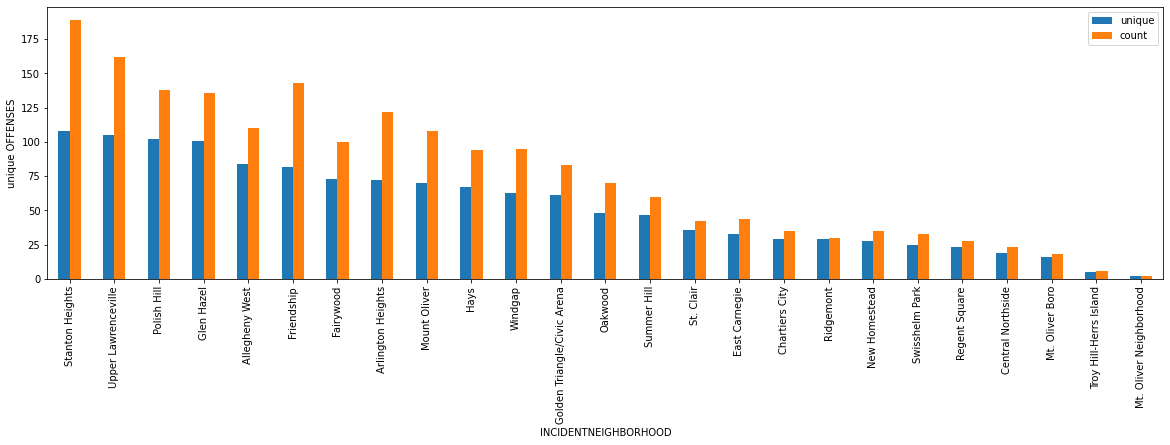

In [153]:
df.sort_values(by='unique', ascending=False).iloc[-25:].plot.bar(y=['unique', 'count'], ylabel='unique OFFENSES', figsize=(20,5))

### These are good contenders
They have: 
- Low # of total offenses
- Low # of unique offenses
- Low variance between the two

## Conclusion